In [5]:
import pandas as pd
import os

In [6]:
df = pd.read_csv('/content/drive/MyDrive/data_science/dataset/data_retail.csv', sep=';')

In [7]:
df['First_Transaction'] = pd.to_datetime(df['First_Transaction']/1000, unit='s', origin='1970-01-01')
df['Last_Transaction'] = pd.to_datetime(df['Last_Transaction']/1000, unit='s', origin='1970-01-01')
print(df['Last_Transaction'])

0       2018-10-05 05:48:02.608000000
1       2018-12-25 11:02:41.269999872
2       2019-01-24 09:40:02.000000000
3       2019-01-16 13:00:03.911000064
4       2018-11-22 12:53:41.529999872
                     ...             
99995   2016-06-01 11:35:39.092000000
99996   2017-02-09 05:46:10.763000064
99997   2015-08-30 08:54:20.706000128
99998   2014-11-14 02:42:28.026000128
99999   2018-10-24 09:36:04.124999936
Name: Last_Transaction, Length: 100000, dtype: datetime64[ns]


In [8]:
del df['no']
del df['Row_Num']

In [9]:
print(df.head())

   Customer_ID Product  ... Average_Transaction_Amount Count_Transaction
0        29531   Jaket  ...                    1467681                22
1        29531  Sepatu  ...                    1269337                41
2       141526     Tas  ...                     310915                30
3       141526   Jaket  ...                     722632                27
4        37545  Sepatu  ...                    1775036                25

[5 rows x 6 columns]


Year_First_Transaction
2013     1007
2014     4954
2015    11235
2016    17656
2017    31828
2018    30327
2019     2993
Name: Customer_ID, dtype: int64


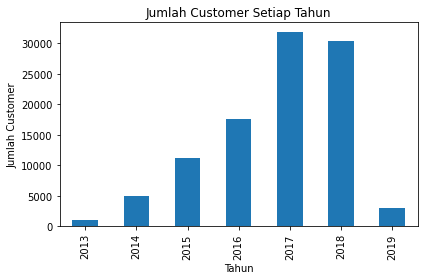

In [10]:
import matplotlib.pyplot as plt
df['Year_First_Transaction'] = df['First_Transaction'].dt.year
df['Year_Last_Transaction'] = df['Last_Transaction'].dt.year

df_year = df.groupby(['Year_First_Transaction'])['Customer_ID'].count()
print(df_year)

df_year.plot(x='Year_First_Transaction', y='Customer_ID', kind='bar', title='Jumlah Customer Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Customer')
plt.tight_layout()
plt.show()

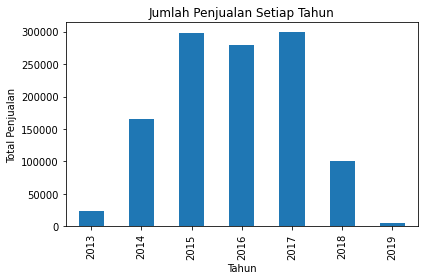

In [11]:
plt.clf()
df_year = df.groupby(['Year_First_Transaction'])['Count_Transaction'].sum()
df_year.plot(x='Year_First_Transaction', y='Count_Transaction', kind='bar', title='Jumlah Penjualan Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.tight_layout()
plt.show()

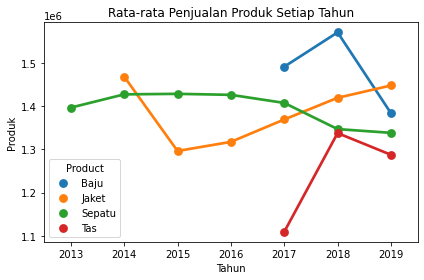

In [12]:
import seaborn as sns
plt.clf()
sns.pointplot(data = df.groupby(['Product','Year_First_Transaction']).mean().reset_index(), 
              x='Year_First_Transaction', 
              y='Average_Transaction_Amount', 
              hue='Product')
plt.xlabel('Tahun')
plt.ylabel('Produk')
plt.title('Rata-rata Penjualan Produk Setiap Tahun')
plt.tight_layout()
plt.show()

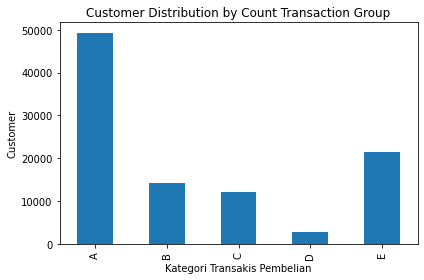

In [13]:
plt.clf()
# Kategorisasi jumlah transaksi
def func(row):
    if row['Count_Transaction'] == 1:
        val = 'A'
    elif (row['Count_Transaction'] >1 and row['Count_Transaction'] <= 3):
        val ='B'
    elif (row['Count_Transaction'] > 3 and row['Count_Transaction'] <= 6):
        val ='C'
    elif (row['Count_Transaction'] > 6 and row['Count_Transaction'] <= 10):
        val ='D'
    else:
        val ='E'
    return val
# Tambahkan kolom baru
df['Count_Transaction_Group'] = df.apply(func, axis=1)

df_year = df.groupby(['Count_Transaction_Group'])['Customer_ID'].count()
df_year.plot(x='Count_Transaction_Group', y='Customer_ID', kind='bar', title='Customer Distribution by Count Transaction Group')
plt.xlabel('Kategori Transakis Pembelian')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

A= 1 
B= 2-3
C= 4-6
D= 7-10
E= >10

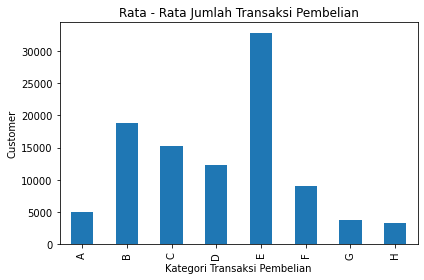

In [14]:
#dISTRIBUSI RATA-RATA TRANSAKSI
def f(row):
    if (row['Average_Transaction_Amount'] >=100000 and row['Average_Transaction_Amount'] <=200000):
        val ='A'
    elif (row['Average_Transaction_Amount'] >250000 and row['Average_Transaction_Amount'] <= 500000):
        val ='B'
    elif (row['Average_Transaction_Amount'] >500000 and row['Average_Transaction_Amount'] <=750000):
        val = 'C'
    elif (row['Average_Transaction_Amount'] >750000 and row['Average_Transaction_Amount'] <=1000000):
        val = 'D'
    elif (row['Average_Transaction_Amount'] >1000000 and row['Average_Transaction_Amount'] <=2500000):
        val = 'E'
    elif (row['Average_Transaction_Amount'] >2500000 and row['Average_Transaction_Amount'] <= 5000000):
        val = 'F'
    elif (row['Average_Transaction_Amount'] >5000000 and row['Average_Transaction_Amount'] <= 10000000):
        val = 'G'
    else:
        val = 'H'
    return val
# Tambahkan kolom baru
df['Average_Transaction_Amount_Group'] = df.apply(f, axis=1)

df_year = df.groupby(['Average_Transaction_Amount_Group'])['Customer_ID'].count()
df_year.plot(x='Average_Transaction_Amount_Group', y='Customer_ID', kind='bar', title='Rata - Rata Jumlah Transaksi Pembelian')
plt.xlabel('Kategori Transaksi Pembelian')
plt.ylabel('Customer')
plt.tight_layout()
plt.show()

A= 100.000 - 250.000
B= 2. >250.000 - 500.000
C= >500.000 - 750.000
D= >750.000 - 1.000.000
E= >1.000.000 - 2.500.000
F= >2.500.000 - 5.000.000
G= >5.000.000 - 10.000.000
H= >10.000.000


